# Neurons selected by gradient magnitude

In [1]:
import torch
from sandbox import SimpleModel, toy_data, experiment_series, eval_series
from pathlib import Path

In [2]:
model_params = (1, 1, 8, 2, 2)

eps = 1e-4
num_kept_neurons = 2
lr=0.005
runs=10

#0: loss: 0.024661464616656303 - size: 209
#1: loss: 0.024000681936740875 - size: 209
#2: loss: 0.03442785143852234 - size: 209
#3: loss: 0.02768411673605442 - size: 209
#4: loss: 0.04278281331062317 - size: 209
#5: loss: 0.0281964298337698 - size: 209
#6: loss: 0.030946243554353714 - size: 209
#7: loss: 0.031306006014347076 - size: 209
#8: loss: 0.035284221172332764 - size: 209
#9: loss: 0.027484934777021408 - size: 209


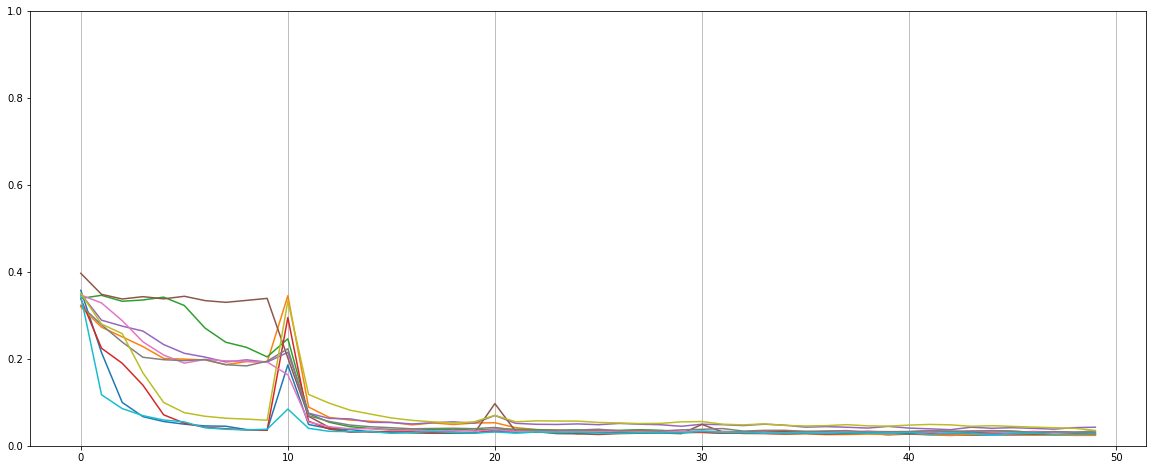

In [3]:
criterion = torch.nn.MSELoss()

def grow(model):
    model.grow(num_novel=4, eps=eps)
    
    with model.new_grad_only():
        model.zero_grad()
        
        for _ in range(200): # batches
            train_x, train_y = toy_data()
            y = model(train_x)
            loss = criterion(y, train_y)

            loss.backward()

        selected = model.select(num_kept_neurons)

    model.degrow(*selected)

series = experiment_series(model_params, runs=runs, grow=grow, lr=lr)

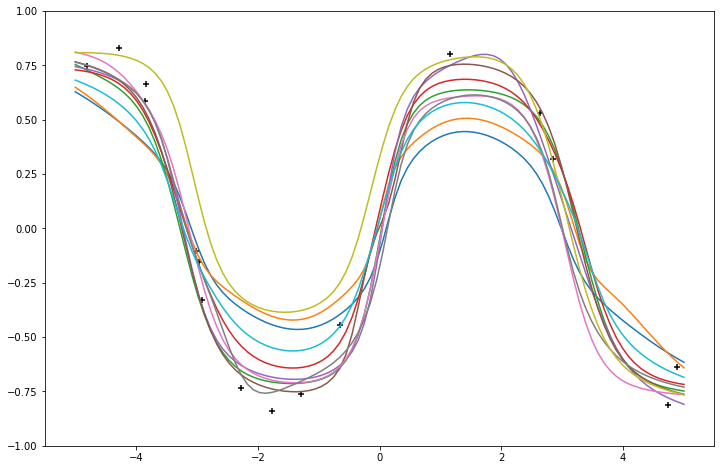

In [4]:
eval_series(series)

In [5]:
d = Path("results")
d.mkdir(parents=True, exist_ok=True)

torch.save(series, d / 'firefly_random.pt')